In [1]:
setwd('/import/DB/workdir/cd40/')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
sce = readRDS('./meyloid.rds')

In [3]:
Idents(sce) = 'celltype'

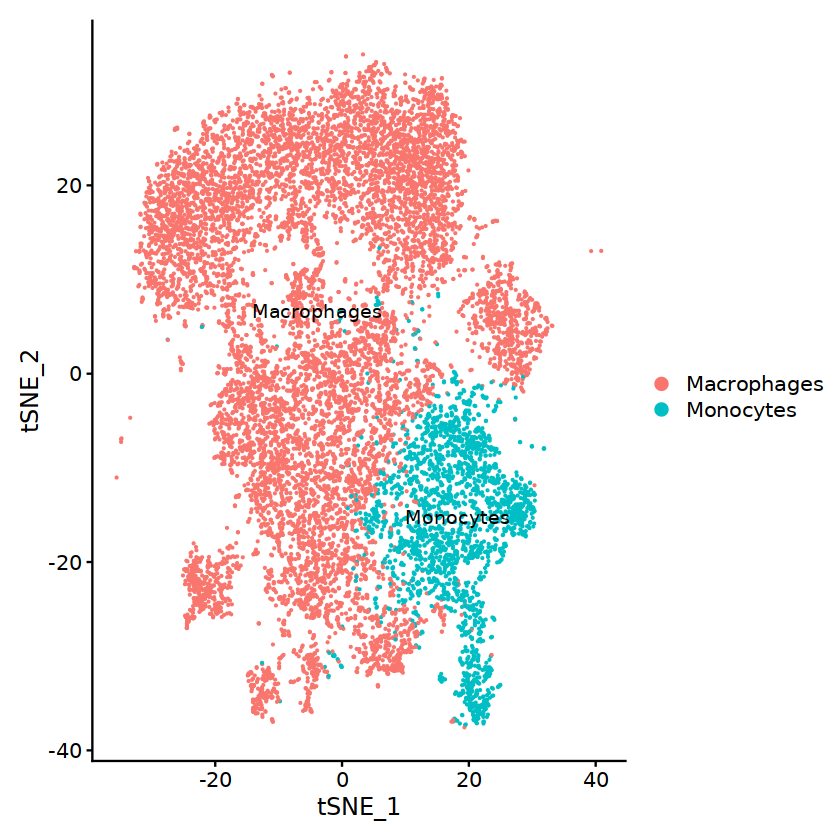

In [4]:
DimPlot(sce, reduction = "tsne",label = T)

In [117]:
table(sce$celltype)


Macrophages   Monocytes 
      10550        2415 

In [163]:
immune.combined = sce

In [164]:
library(harmony)

In [165]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 30, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.2)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14384 anchors

Filtering anchors

	Retained 6562 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12965
Number of edges: 467228

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9196
Number of communities: 9
Elapsed time: 3 seconds


13:38:44 UMAP embedding parameters a = 0.9922 b = 1.112

13:38:44 Read 12965 rows and found 20 numeric columns

13:38:44 Using Annoy for neighbor search, n_neighbors = 30

13:38:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:38:45 Writing NN index file to temp file /tmp/RtmpcPO6yv/file33686ac66e64

13:38:45 Searching Annoy index using 1 thread, search_k = 3000

13:38:48 Annoy recall = 100%

13:38:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:38:50 Initializing from normalized Laplacian + noise (using irlba)

13:38:51 Commencing optimization for 200 epochs, with 564930 positive edges

13:39:05 Optimization finished



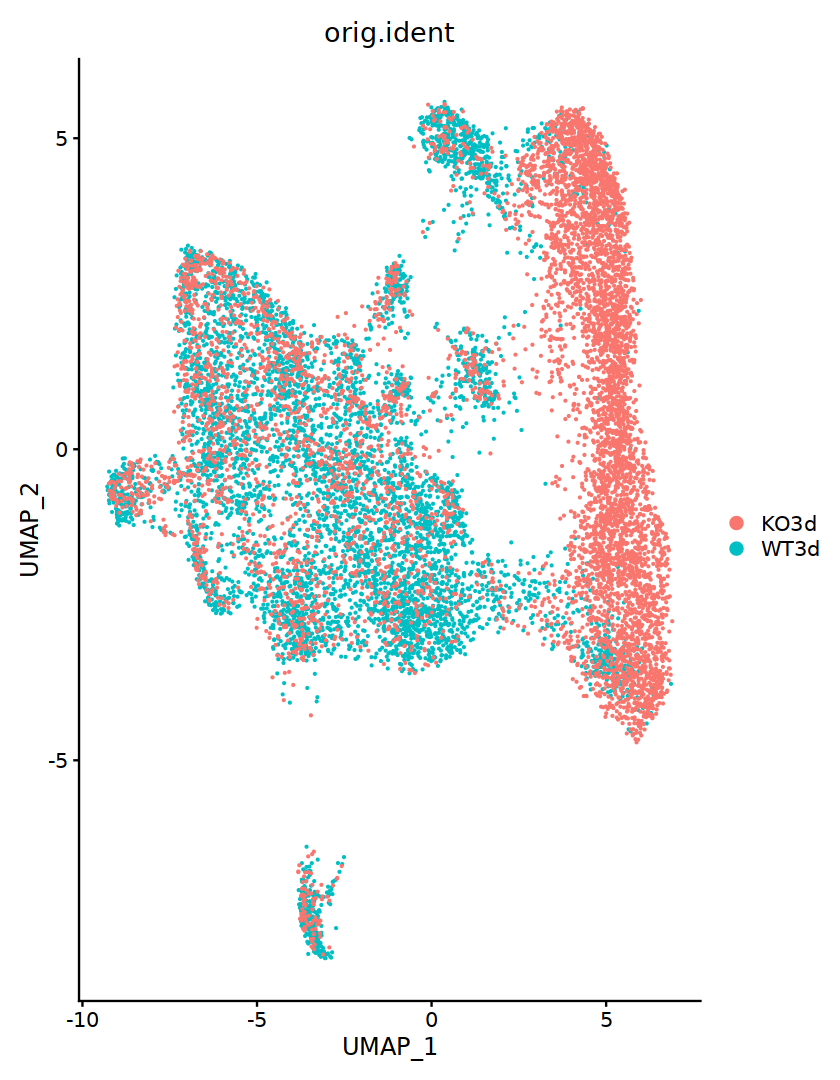

In [166]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

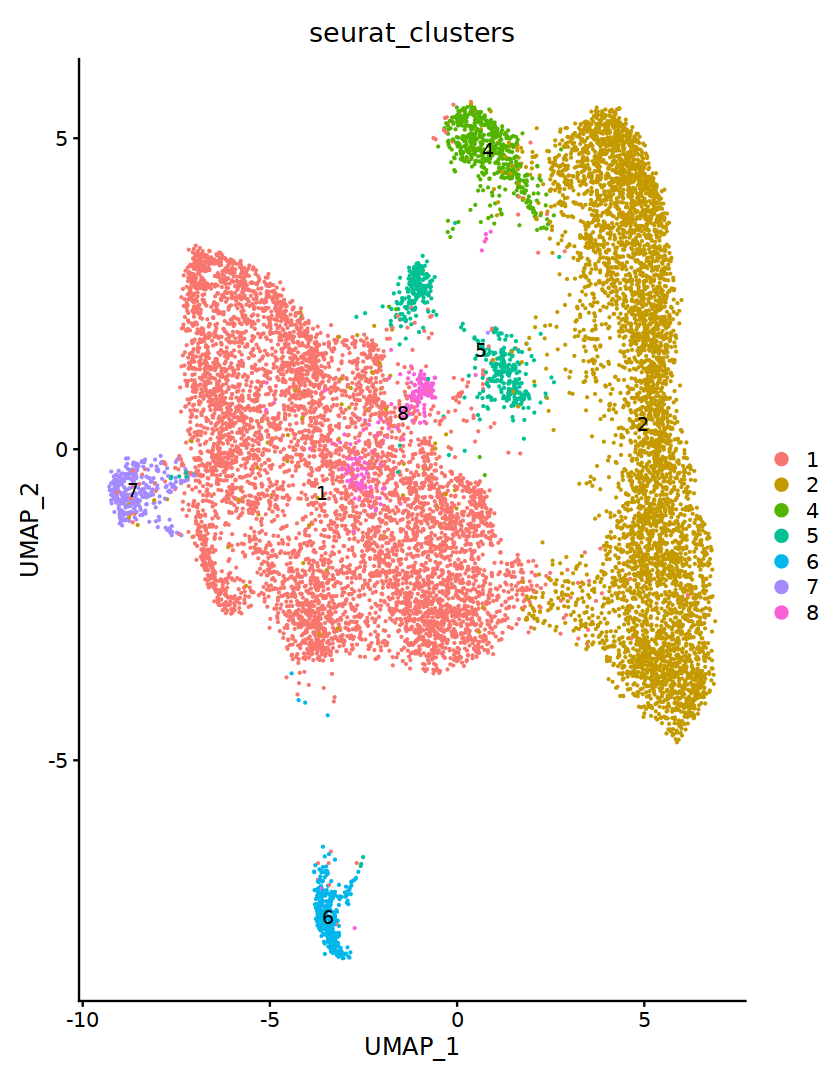

In [173]:
DimPlot(immune.combined, reduction = "umap", group.by = "seurat_clusters",label = TRUE)

In [168]:
#immune.combined$seurat_clusters = gsub('8','1',immune.combined$seurat_clusters)

In [169]:
immune.combined$seurat_clusters = gsub('0','1',immune.combined$seurat_clusters)

In [170]:
immune.combined$seurat_clusters = gsub('3','2',immune.combined$seurat_clusters)

In [171]:
Idents(immune.combined) = 'seurat_clusters'
DefaultAssay(immune.combined) = 'RNA'


sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)



Calculating cluster 2

Calculating cluster 1

Calculating cluster 5

Calculating cluster 4

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [172]:
write.csv(sce.markers,file = 'sce.markers.myleoid..celltype.csv')

In [147]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
library(ggplot2)

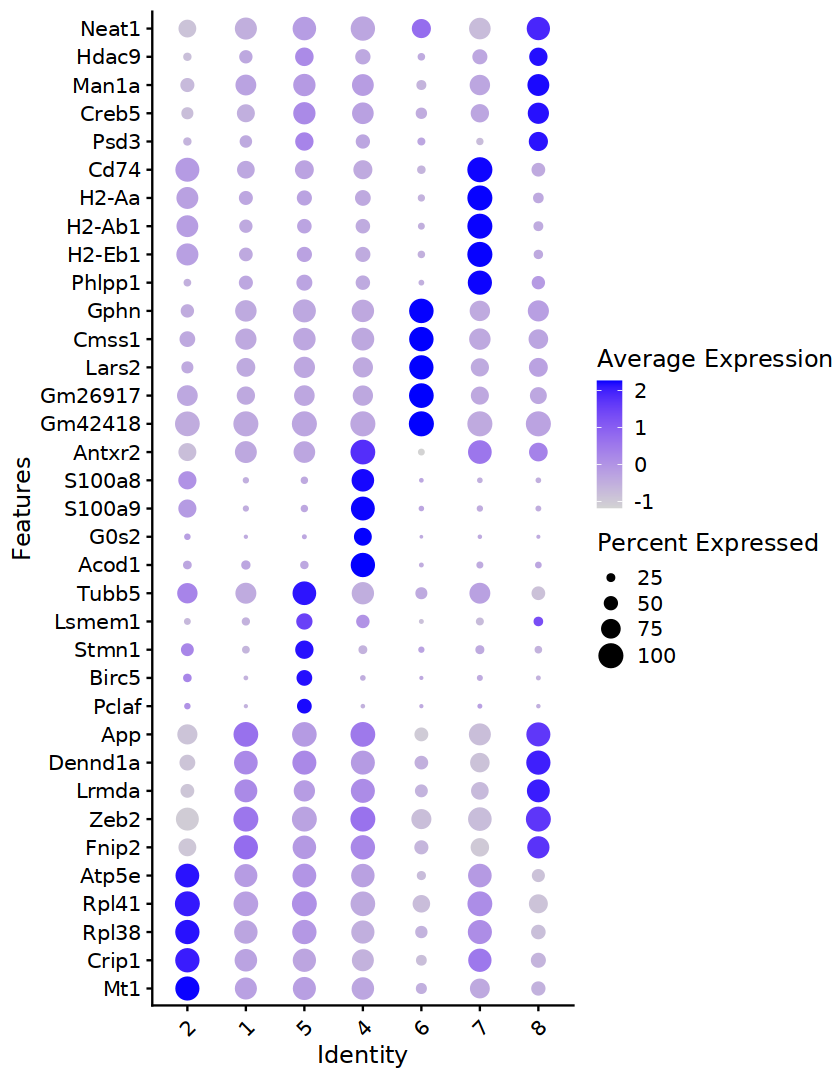

In [148]:

options(repr.plot.height = 9)
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))
# n2 = replace(n1,16:17,c('Spp1','Gpnmb'))
# n3 = replace(n2,40,c('Xcr1'))
DotPlot(immune.combined, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [ ]:
## cluster2 CRIP1 MIF  TAM
cluster1  no marker gene
5  proliferating marco  Top2a Mki67 Stmn1
6 Lars2 macro
4  S100a9/8, Retnlg, and Lcn2  
7 (H2-Eb2, H2-Aa) and Cd74  MHC-II molecule

In [ ]:
#常驻 巨噬细胞   1. Lyve1 Timd4 ccr2- 2. Lyve- Timd4- ccr2-

In [198]:
Idents(immune.combined) = 'orig.ident'

In [200]:
table(immune.combined$orig.ident)


KO3d WT3d 
6816 6149 

In [210]:
KO3d = subset(immune.combined,idents = 'KO3d')

In [213]:
Idents(immune.combined) = 'seurat_clusters'

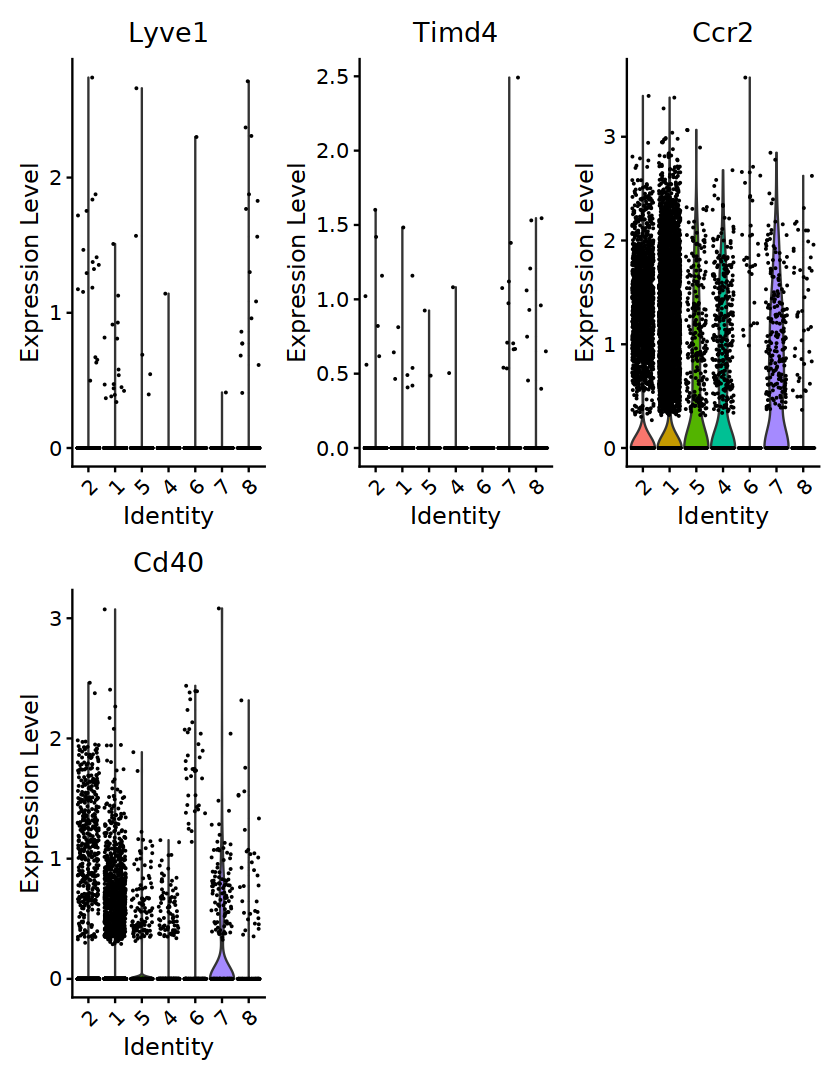

In [214]:
VlnPlot(immune.combined,features = c('Lyve1','Timd4','Ccr2','Cd40'))

## HARMONY

### https://maayanlab.cloud/Harmonizome/gene_set/efferocytosis/GeneRIF+Biological+Term+Annotations  宝藏作用

In [185]:
Idents(immune.combined) = 'orig.ident'

Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
"The following requested variables were not found: Mir21"
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of Kng1."


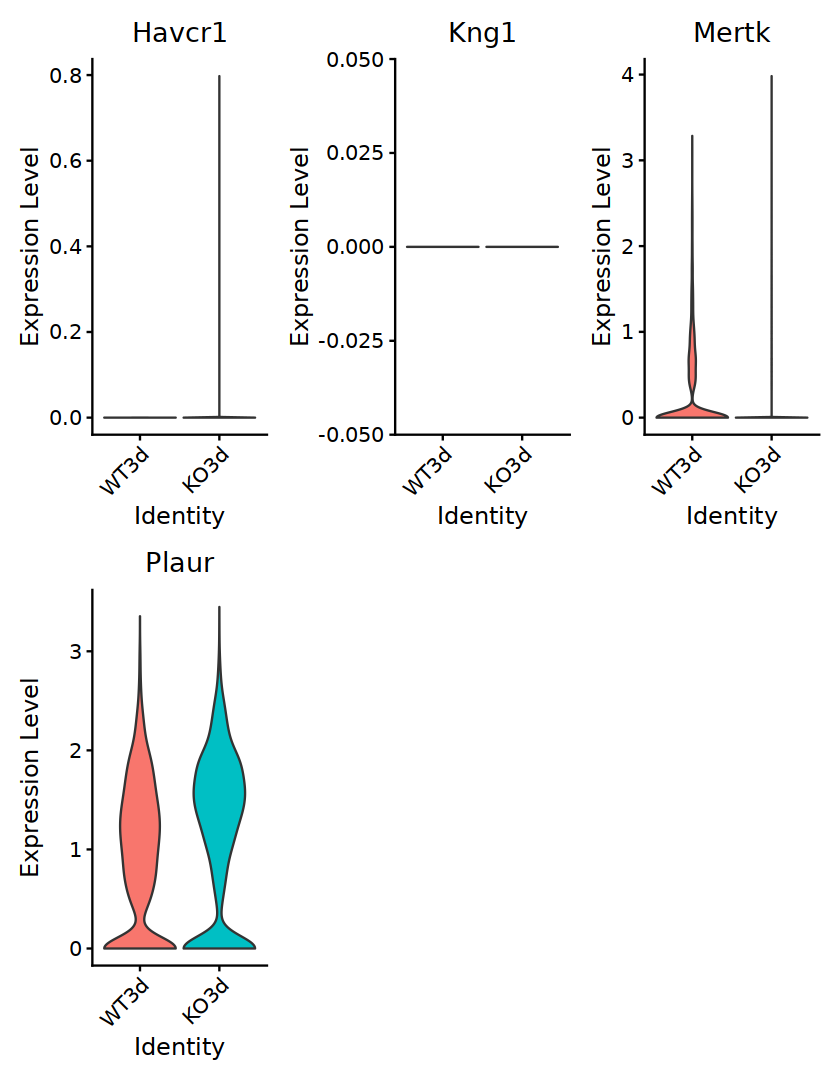

In [189]:
VlnPlot(immune.combined,features = c('Havcr1','Kng1','Mertk','Mir21','Plaur'),pt.size = 0)

In [215]:
immune.combined = sce
immune.combined <-NormalizeData(immune.combined) %>% FindVariableFeatures()
immune.combined<-ScaleData(immune.combined,feature=rownames(immune.combined)) %>% RunPCA(verbose = FALSE) %>% RunHarmony( group.by.vars = "orig.ident")
immune.combined<-RunUMAP(immune.combined, reduction = "harmony", dims = 1:20)
immune.combined<-RunTSNE(immune.combined, reduction = "harmony", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "harmony", dims = 1:20) %>% FindClusters()

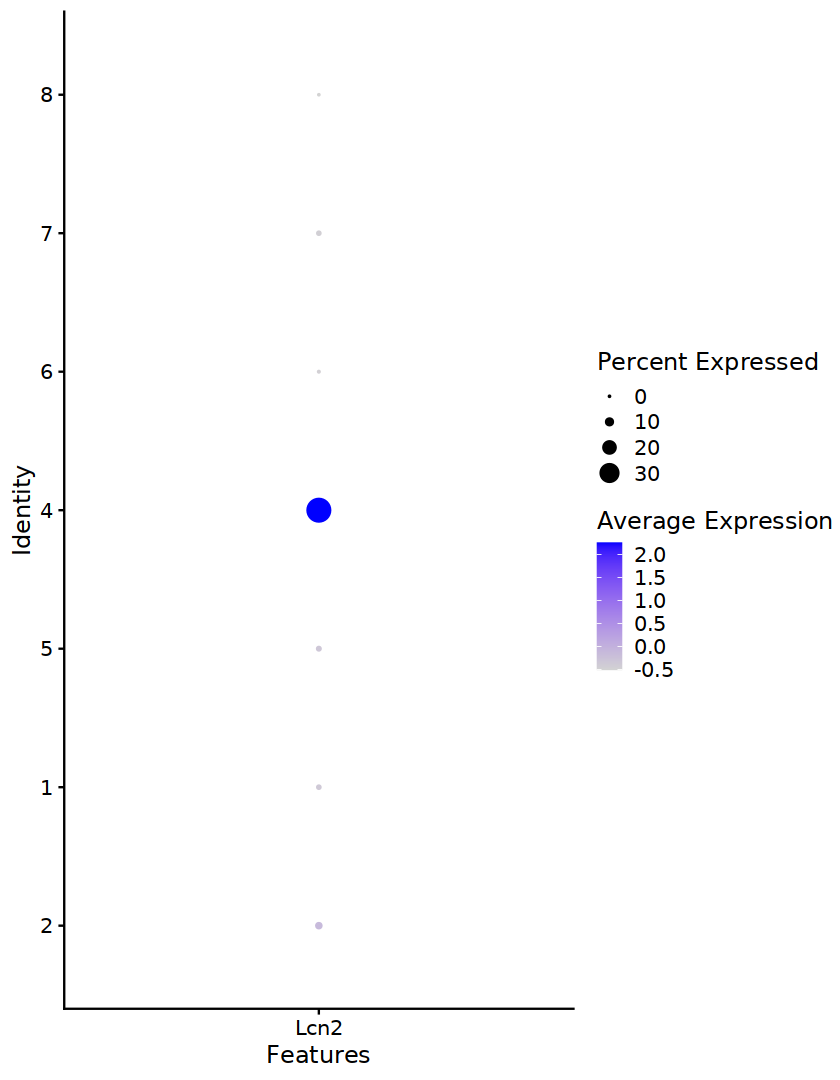

In [179]:
DotPlot(immune.combined,features = c('Lcn2'))

In [5]:
Idents(sce) = 'seurat_clusters'

In [6]:
sce1= sce

In [ ]:
Idents(sce1)  ='seurat_clusters'

In [52]:
celltype = data.frame(
    cluster = c(0,1,2,3,4,5,6,7),
    celltype = c('MHCII TAM','Cd209a cDC2','classical mono','Sparc+ TAM','SPP1+ TAM','ISG+ TAM',
                'Proliferating cDC2','cDC1')
)

In [54]:
for(i in 1:nrow(celltype)){
  sce1@meta.data[which(sce1@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [56]:
table(sce1$celltype)


       Cd209a cDC2           ISG+ TAM          MHCII TAM Proliferating cDC2 
               965                368               1042                241 
         SPP1+ TAM         Sparc+ TAM               cDC1     classical mono 
               790                875                185                895 

In [57]:
Idents(sce1) = 'celltype'

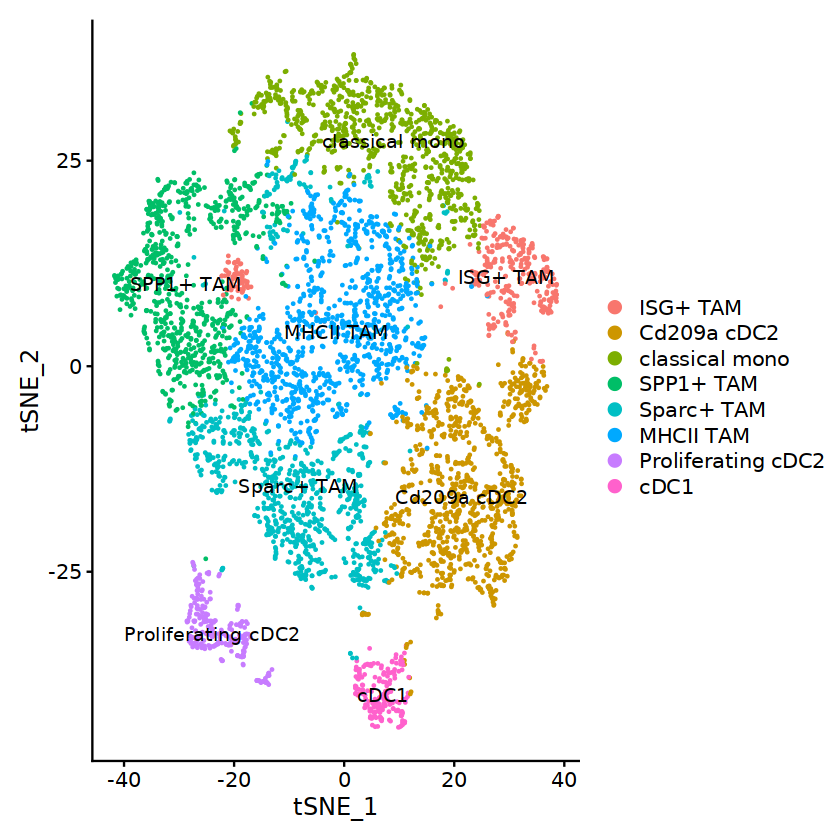

In [58]:
DimPlot(sce1, reduction = "tsne",label = T)

In [59]:
Idents(sce1) = 'celltype'

In [60]:
sce.markers <- FindAllMarkers(object = sce1, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

write.csv(sce.markers,file = 'sce.markers.myleoid..celltype.csv')

Calculating cluster ISG+ TAM

Calculating cluster Cd209a cDC2

Calculating cluster classical mono

Calculating cluster SPP1+ TAM

Calculating cluster Sparc+ TAM

Calculating cluster MHCII TAM

Calculating cluster Proliferating cDC2

Calculating cluster cDC1



In [88]:
ggsave('myleoid.marker.pdf',height = 9,width = 6)

In [ ]:
# c7          Xcr1 cDC1
#  c6 Proliferating cDC2    Fcer1a  mki67 top2a
# c2   Classcal monocyte CD14, VCAN  LY6c2
#  c5  ISG15+ TAM   Ifitm3','Isg15','Cxcl10  
# c4  SPP1+ TAM   SPP1, GPNMB
# c1 cd209a  cd209a H2-DMb2
# c3   sparc+ TAM 
# c0 MHCII 

In [92]:
Idents(sce1)  = 'celltype'

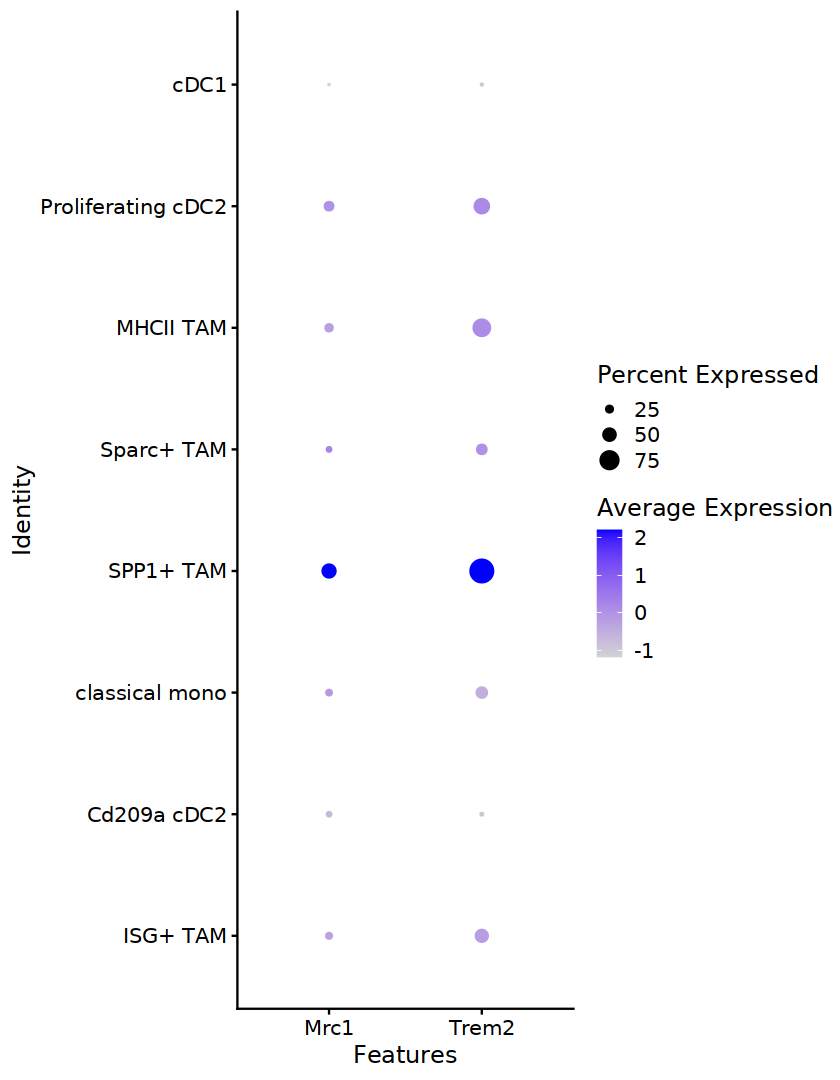

In [94]:
DotPlot(sce1,features = c('Mrc1','Trem2'))

In [96]:
saveRDS(sce1,file = 'mac.mono.res.rds')